<a href="https://colab.research.google.com/github/bksgupta/south-indian-food-detector/blob/master/south_indian_food_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from fastai.vision import *

In [6]:
folder = 'idli'
file = 'urls_idli.txt'

In [10]:
folder = 'vada'
file = 'urls_vada.txt'

In [14]:
folder = 'dosa'
file = 'urls_dosa.txt'

In [18]:
folder = 'uttapam'
file = 'urls_uttapam.txt'

In [19]:
path = Path('data/food_items')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [20]:
classes = ['idli','vada','dosa','uttapam']

In [21]:
download_images(path/file, dest, max_pics=200)

In [22]:
path.ls()

[PosixPath('data/food_items/urls_vada.txt'),
 PosixPath('data/food_items/uttapam'),
 PosixPath('data/food_items/urls_idli.txt'),
 PosixPath('data/food_items/dosa'),
 PosixPath('data/food_items/idli'),
 PosixPath('data/food_items/urls_dosa.txt'),
 PosixPath('data/food_items/vada'),
 PosixPath('data/food_items/urls_uttapam.txt')]

In [23]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

idli


vada


dosa


uttapam


In [24]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [25]:
data.classes

['dosa', 'idli', 'uttapam', 'vada']

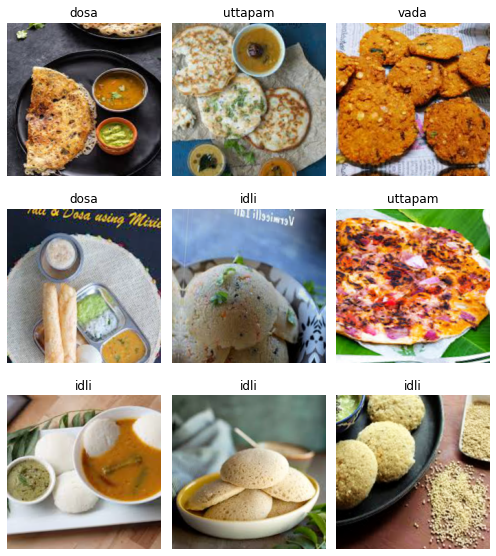

In [26]:
data.show_batch(rows=3, figsize=(7,8))

In [27]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['dosa', 'idli', 'uttapam', 'vada'], 4, 640, 160)

In [30]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [31]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.067575,0.916995,0.337500,00:08
1,1.442671,0.545750,0.181250,00:08
2,1.081702,0.562959,0.125000,00:08
3,0.844121,0.519022,0.156250,00:08
4,0.700860,0.485272,0.181250,00:08
5,0.589186,0.454160,0.162500,00:08
6,0.509532,0.439239,0.168750,00:08
7,0.450161,0.435847,0.156250,00:08


In [32]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 1.00E-04


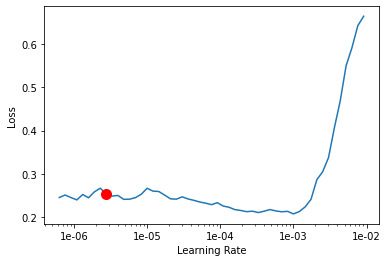

In [33]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [34]:
learn.fit_one_cycle(3, max_lr=slice(5e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.274254,0.445390,0.162500,00:09
1,0.248930,0.430933,0.150000,00:09
2,0.226473,0.412257,0.137500,00:09


In [35]:
learn.save('stage-2')

In [36]:
learn.load('stage-2');

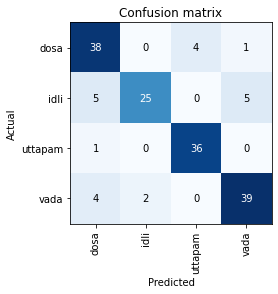

In [37]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [38]:
learn.export()

In [39]:
defaults.device = torch.device('cpu')

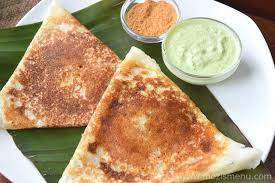

In [41]:
img = open_image(path/'dosa'/'00000021.jpg')
img

In [42]:
learn = load_learner(path)

In [43]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class,pred_idx,outputs,data.classes[pred_idx]

(Category tensor(0),
 tensor(0),
 tensor([1.0000e+00, 9.9140e-09, 6.9622e-08, 9.9631e-11]),
 'dosa')